# import 및 환경설정

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 


# 데이터 로드 및 데이터 확인

In [3]:
# 데이터 파일 로드
df = pd.read_csv('hotel_bookings.csv')

열 설명 (인코딩 후 수정필요)
0. hotel : 호텔종류(Resort/City Hotel)
1. is_canceled : 취소여부(1: yes, 0: no)
2. lead_time : 예약한 날짜와 호텔에 도착한 날짜 사이의 경과일
3. arrival_date_year : 호텔도착년도
4. arrival_date_month : 호텔도착월
5. arrival_date_week_number : 호텔도착주
6. arrival_date_day_of_month : 호텔도착일
7. stays_in_weekend_nights : 주말 숙박일수(토요일, 일요일)
8. stays_in_week_nights : 평일 숙박 일수
9. adults : 성인 인원수
10. children : 아동/청소년 인원수
11. babies : 유아인원수
12. meal : 식사예약종류
13. country : 호텔위치 국가
14. market_segment : 마켓구분(TA: Travel Agents , TO: Tour Operators)
15. distribution_channel : 예약채널(TA: Travel Agents , TO: Tour Operators)
16. is_repeated_guest : 재방분고객여부(1: yes, 0: no)
17. previous_cancellations : 이번 예약전에 고객이 취소한 예약수
18. previous_bookings_not_canceled : 이번 예약전에 고객이 취소하지 않은 예약수
19. reserved_room_type : 예약객실타입
20. assigned_room_type : 배정된 객실 타입
21. booking_changes : 예약 후 변경/수정횟수
22. deposit_type : 보증금 타입
23. agent : 예약에이전트(ID로 대체)
24. company : 예약회사명(ID로 대체)
25. days_in_waiting_list : 예약확정전까지 대기 명단에 있었던 기간
26. customer_type : 고객유형
27. adr : 평균 일일 숙박비
28. required_car_parking_spaces : 주차공간을 요구하는 차량대수
29. total_of_special_requests : 특별한 요청수
30. reservation_status : 마지막 예약상태
31. reservation_status_date : 마지막 예약상태가 설정된 일자

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 결측치 확인

In [6]:
## 결측치 확인
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
#결측치 비울 확인
for col in df.columns:
    msg = 'p : %.5f%% ---- %s \t\t'%(df[col].isnull().sum()/df[col].shape[0],col)
    print(msg)

p : 0.00000% ---- hotel 		
p : 0.00000% ---- is_canceled 		
p : 0.00000% ---- lead_time 		
p : 0.00000% ---- arrival_date_year 		
p : 0.00000% ---- arrival_date_month 		
p : 0.00000% ---- arrival_date_week_number 		
p : 0.00000% ---- arrival_date_day_of_month 		
p : 0.00000% ---- stays_in_weekend_nights 		
p : 0.00000% ---- stays_in_week_nights 		
p : 0.00000% ---- adults 		
p : 0.00003% ---- children 		
p : 0.00000% ---- babies 		
p : 0.00000% ---- meal 		
p : 0.00409% ---- country 		
p : 0.00000% ---- market_segment 		
p : 0.00000% ---- distribution_channel 		
p : 0.00000% ---- is_repeated_guest 		
p : 0.00000% ---- previous_cancellations 		
p : 0.00000% ---- previous_bookings_not_canceled 		
p : 0.00000% ---- reserved_room_type 		
p : 0.00000% ---- assigned_room_type 		
p : 0.00000% ---- booking_changes 		
p : 0.00000% ---- deposit_type 		
p : 0.13686% ---- agent 		
p : 0.94307% ---- company 		
p : 0.00000% ---- days_in_waiting_list 		
p : 0.00000% ---- customer_type 		
p : 0.00000%

<Axes: >

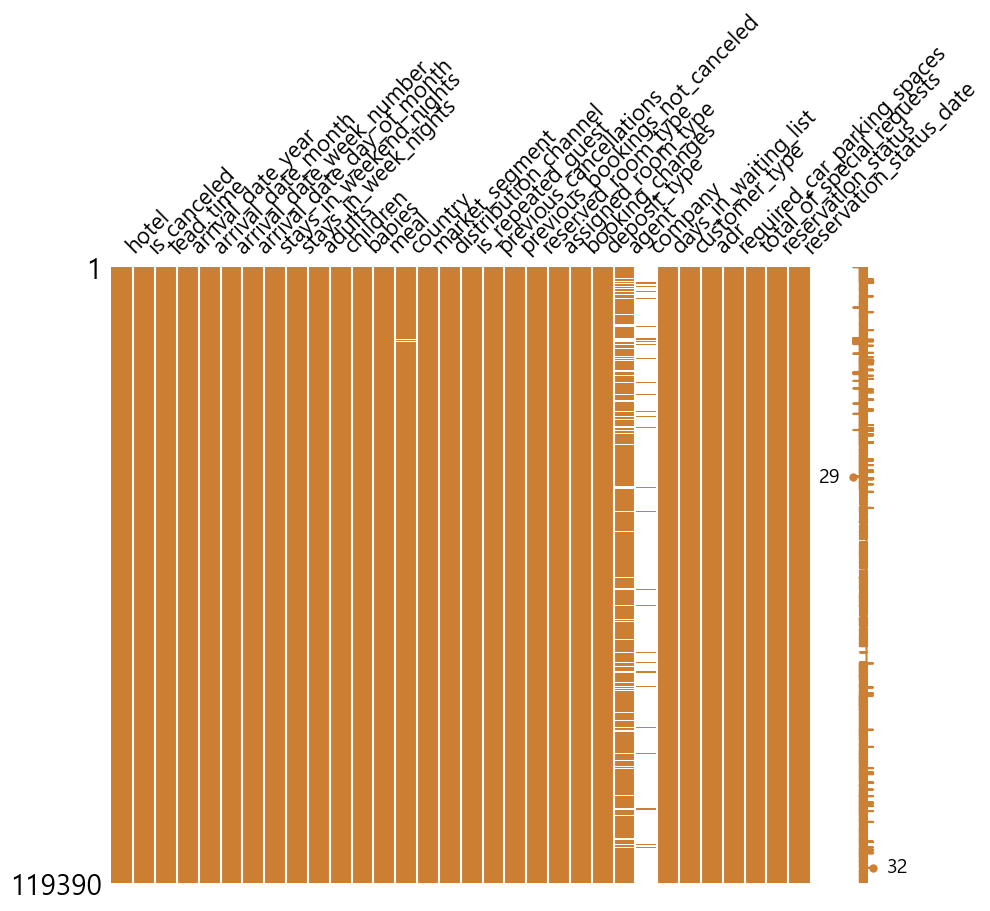

In [8]:
#결측치 시각화(missingno)
msno.matrix(df=df.loc[:,:],figsize=(10,8),color=(0.8,0.5,0.2))

# EDA

### 각 feature 별 unique value 확인하기

In [9]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}\n")

hotel: ['Resort Hotel' 'City Hotel']

is_canceled: [0 1]

lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 23

### hotel : 호텔종류(Resort/City Hotel)

In [10]:
df["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

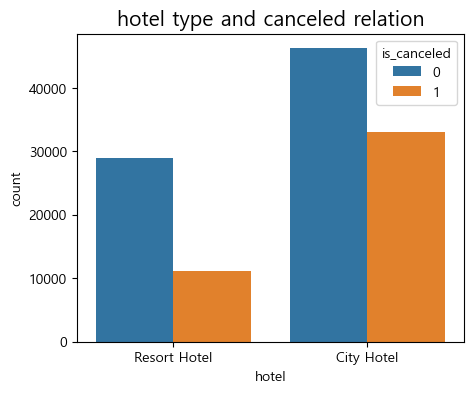

In [11]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('hotel type and canceled relation', fontsize=15)
plt.show()

### is_canceled : 취소여부(1: yes, 0: no) 대한 EDA

<Axes: ylabel='count'>

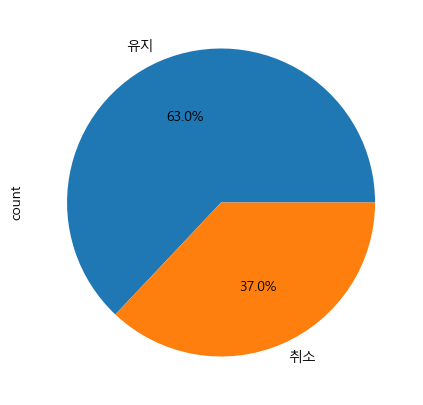

In [12]:
# 취소 비율 확인
df["is_canceled"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['유지', '취소']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',  # 백분율(소수 첫째자리까지)
                                          labels=labels)

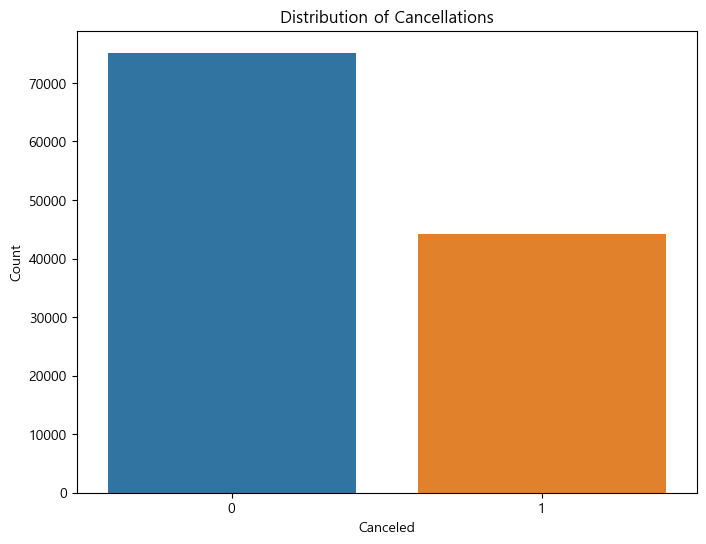

In [13]:


# 숙박 취소 여부에 따른 분포
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Cancellations')
plt.xlabel('Canceled')  # 1: 취소, 0: 취소x
plt.ylabel('Count')
plt.show()

### lead_time : 예약한 날짜와 호텔에 도착한 날짜 사이의 경과일에 대한 EDA

### lead time 과 취소 관계

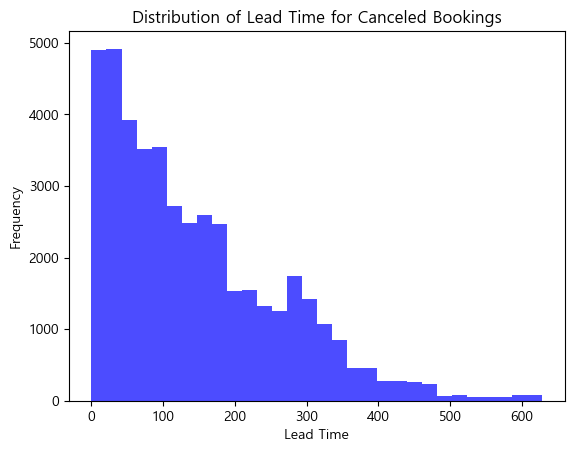

In [14]:
# lead_time에 따른 취소량 확인

# is_canceled가 1인 샘플들의 lead_time 데이터 추출
lead_time_cancelled = df[df['is_canceled'] == 1]['lead_time']


# 히스토그램 그리기
plt.hist(lead_time_cancelled, bins=30, color='blue', alpha=0.7)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time for Canceled Bookings')
plt.show()

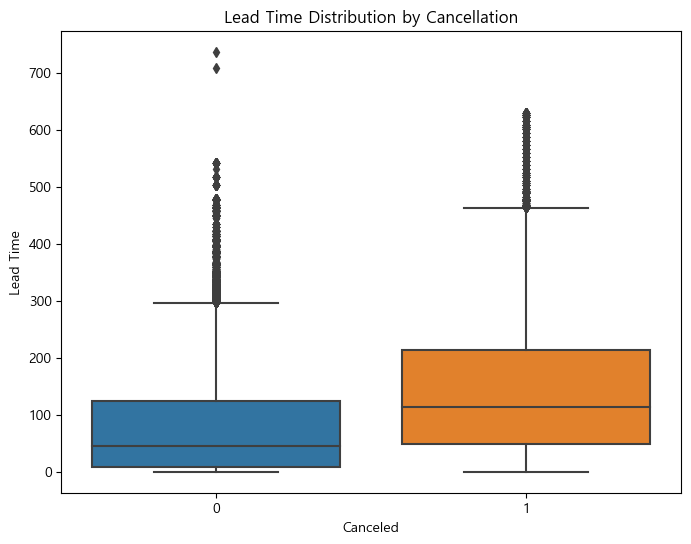

In [15]:
# 숙박 취소 여부에 따른 lead_time 분포
# lead_time : 예약한 날짜와 호텔에 도착한 날짜 사이의 경과일
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)  # 1 : 취소 / 0 : 취소x
plt.title('Lead Time Distribution by Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time')
plt.show()

In [16]:
### lead time 과 취소의 관계

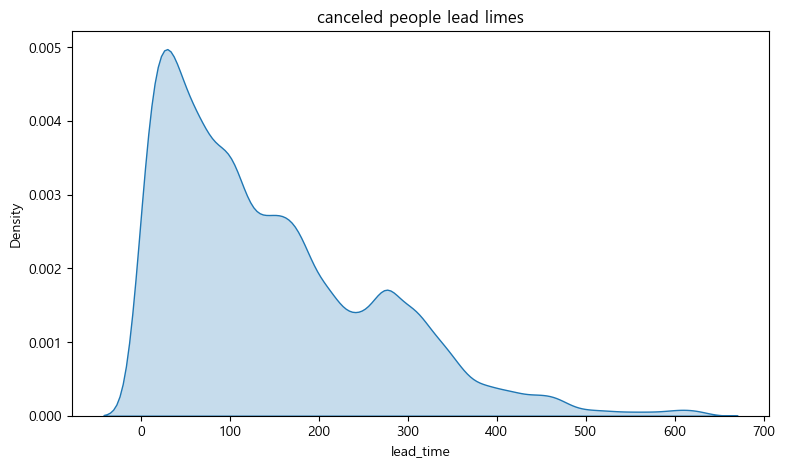

In [17]:
f,ax  = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df[df['is_canceled'] == 1]['lead_time'],ax=ax , fill= True)
plt.title('canceled people lead limes')
plt.show()

### 호텔 도착년도/월/주/도착일/숙박일수/주말숙박일수/평일숙박일수에 대한 EDA

In [18]:
# 'arrival_date_year' 값 확인 (2015 ~ 2017)
print(df['arrival_date_year'].value_counts())
print('\n')
# 'arrival_date_month' 값 확인
print(df['arrival_date_month'].value_counts())
print('\n')
# 'arrival_date_week_number' 값 확인 (1 ~ 53)
print(df['arrival_date_week_number'].value_counts())
print('\n')
# 'arrival_date_day_of_month' 값 확인
print(df['arrival_date_day_of_month'].value_counts())
print('\n')
# 'stays_in_weekend_nights' 값 확인
print(df['stays_in_weekend_nights'].value_counts())

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64


arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64


arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: count, dtype: int64


a

### 월별 데이터 EDA

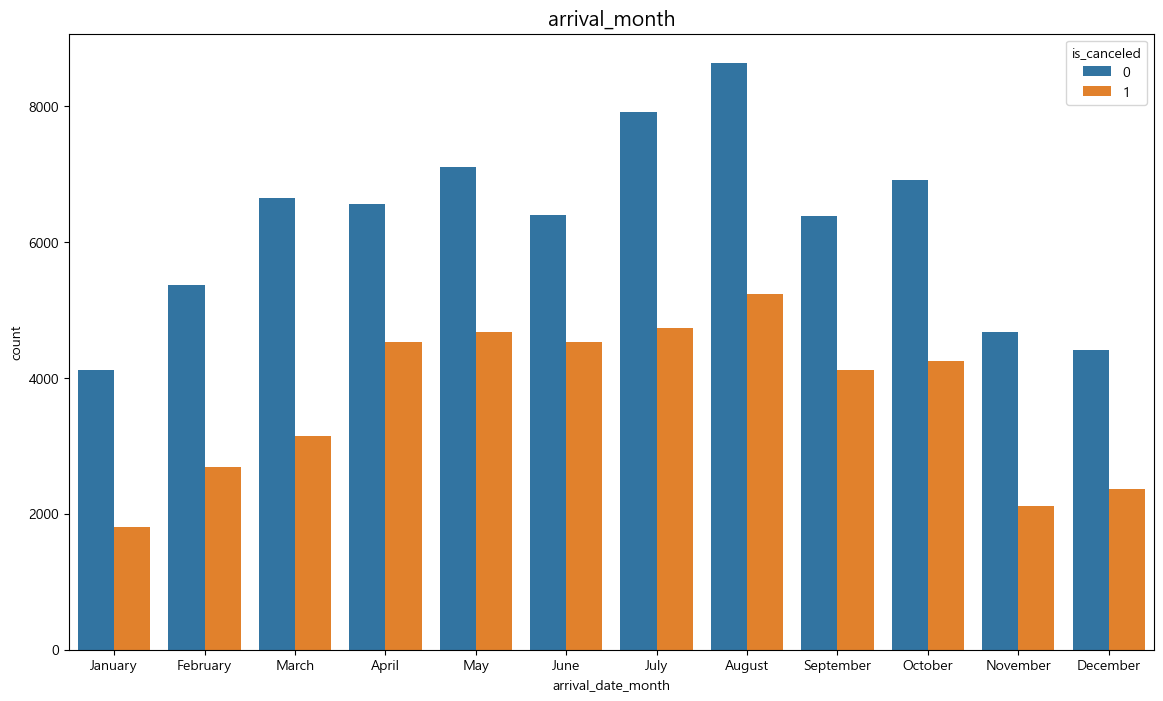

In [19]:
plt.figure(figsize=(14,8))
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled',order=month_order)
plt.title('arrival_month', fontsize=15)
plt.show()

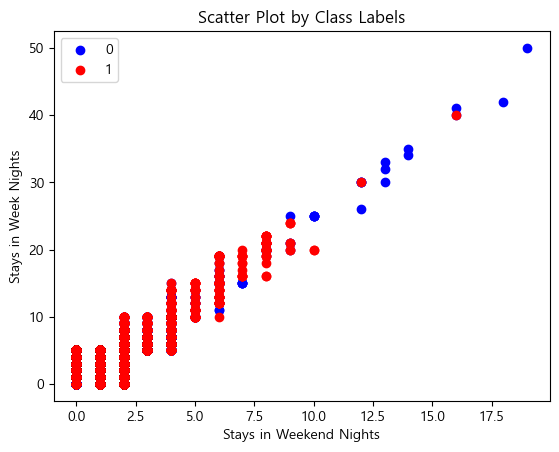

In [20]:
class_labels = []
row_indices = []

# 클래스 레이블과 해당 레이블에 대한 행 인덱스를 추출
for label in df['is_canceled'].unique():
    class_labels.append(label)
    row_indices.append(np.where(df['is_canceled'] == label)[0])

# 클래스 레이블과 색상을 매핑하는 딕셔너리 생성
label_color_map = {0: 'blue', 1: 'red'}

# 산점도 그리기
for label, indices in zip(class_labels, row_indices):
    plt.scatter(df.iloc[indices, df.columns.get_loc('stays_in_weekend_nights')],
                df.iloc[indices, df.columns.get_loc('stays_in_week_nights')],
                label=label, c=label_color_map[label])

# 그래프 제목과 레이블 설정
plt.title('Scatter Plot by Class Labels')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

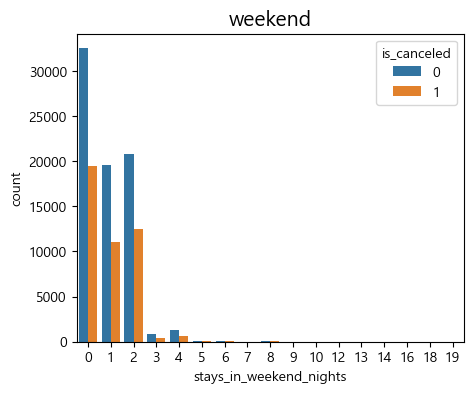

In [21]:
plt.figure(figsize=(5, 4))

sns.countplot(data=df, x='stays_in_weekend_nights', hue='is_canceled')
plt.title('weekend', fontsize=15)
plt.show()


### 성인/아동/청소년 인원수/에 대한 EDA

In [22]:
adults = df['adults'].value_counts()
babies_counts = df['babies'].value_counts()
children_counts = df['children'].value_counts()
print("adults Counts:")
print(adults)

print("\nBabies Counts:")
print(babies_counts)

print("\nChildren Counts:")
print(children_counts)

adults Counts:
adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

Babies Counts:
babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

Children Counts:
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64


### meal : 식사예약종류에 대한 EDA

In [23]:
meals = df['meal'].value_counts()
print("\n meals Counts:")
print(meals)


 meals Counts:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64


### country : 호텔위치 국가에 대한 EDA

In [24]:
meals = df['country'].value_counts()
print("\n meals Counts:")
print(meals)


 meals Counts:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


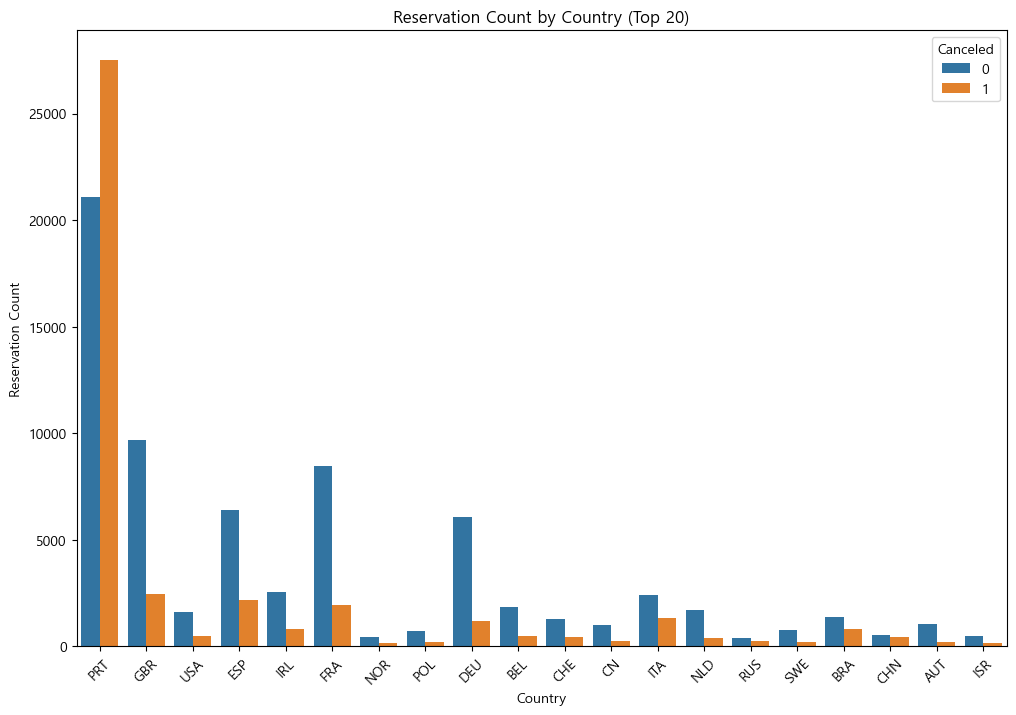

In [25]:
# 국가별 예약 수 계산
country_reservation_counts = df['country'].value_counts()

# 상위 20개 국가 선택
top_20_countries = country_reservation_counts.head(20)

# 데이터프레임으로 변환하여 상위 20개 국가 데이터 저장
top_20_countries_df = top_20_countries.reset_index()
top_20_countries_df.columns = ['country', 'reservation_count']

# 상위 20개 국가 데이터 기반으로 새로운 데이터프레임 생성
df_top_20_countries = df[df['country'].isin(top_20_countries.index)]

# 시각화
plt.figure(figsize=(12, 8))
sns.countplot(x='country', hue='is_canceled', data=df_top_20_countries)
plt.xlabel('Country')
plt.ylabel('Reservation Count')
plt.title('Reservation Count by Country (Top 20)')
plt.legend(title='Canceled', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### market_segment : 마켓구분(TA: Travel Agents , TO: Tour Operators)에 대한 EDA

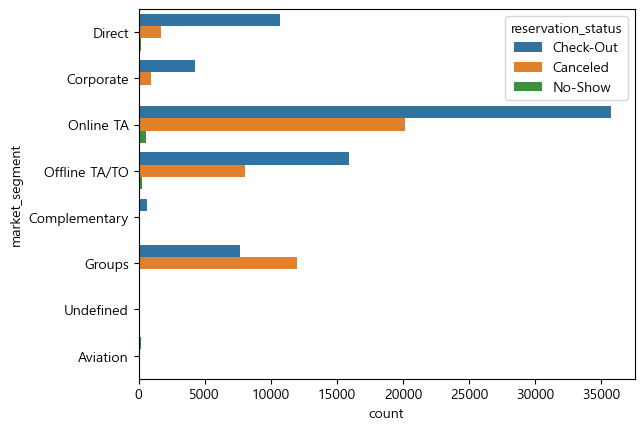

In [26]:
# 마켓별 Check-Out, Cancel, No-Show 비율 출력
sns.countplot(data=df, y='market_segment', hue='reservation_status')
plt.show()

### distribution_channel : 예약채널(TA: Travel Agents , TO: Tour Operators)에 대한 EDA

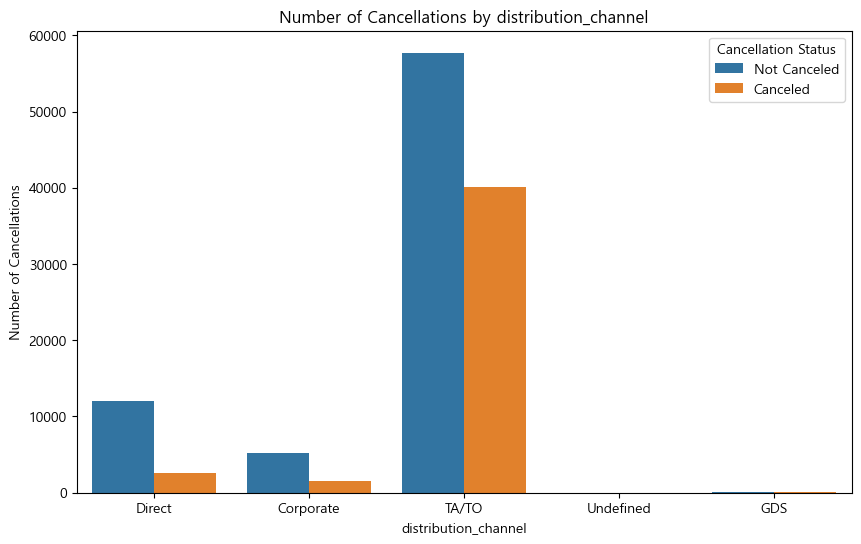

In [27]:
# distribution_channel에 따른 취소
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

# 그래프 제목과 레이블 설정
plt.title('Number of Cancellations by distribution_channel')
plt.xlabel('distribution_channel')
plt.ylabel('Number of Cancellations')

# 범례 추가
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])

# 그래프 출력
plt.show()

### is_repeated_guest : 재방분고객여부(1: yes, 0: no)에 대한 EDA

In [28]:
# 'is_repeated_guest' 값 확인
print(df['is_repeated_guest'].value_counts())

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64


### previous_cancellations : 이번 예약전에 고객이 취소한 예약수에 대한 EDA

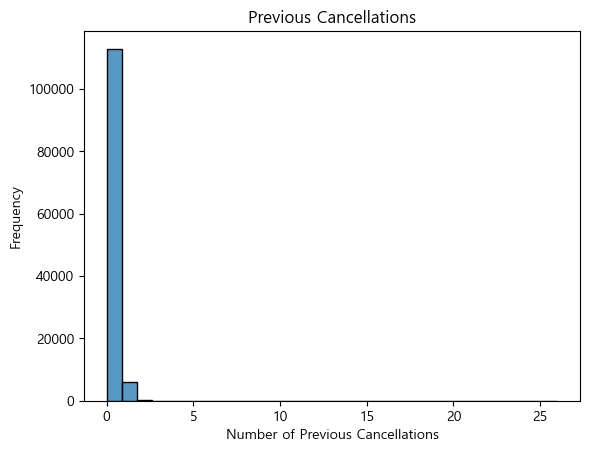

In [29]:
# 'previous_cancellations' 에 따른 취소 그래프 확인
sns.histplot(df['previous_cancellations'], kde=False, bins=30)
plt.title('Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.show()

### previous cancellation에 대해 현재 취소 및 미취소

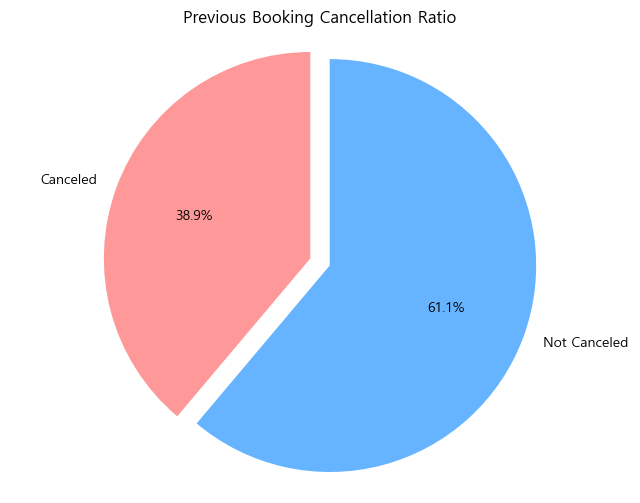

In [30]:
# previous_cancellations와 previous_bookings_not_canceled의 합
total_cancellations = df['previous_cancellations'].sum()
total_not_canceled = df['previous_bookings_not_canceled'].sum()

# 비율 계산
cancellation_ratio = total_cancellations / (total_cancellations + total_not_canceled)
not_canceled_ratio = total_not_canceled / (total_cancellations + total_not_canceled)

# 원형 그래프 그리기
labels = ['Canceled', 'Not Canceled']
sizes = [cancellation_ratio, not_canceled_ratio]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # 강조할 부분 지정

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Previous Booking Cancellation Ratio')
plt.axis('equal')  # 원의 형태 유지
plt.show()


### 과거 취소가 2 이상인 데이터들에 대한 분석

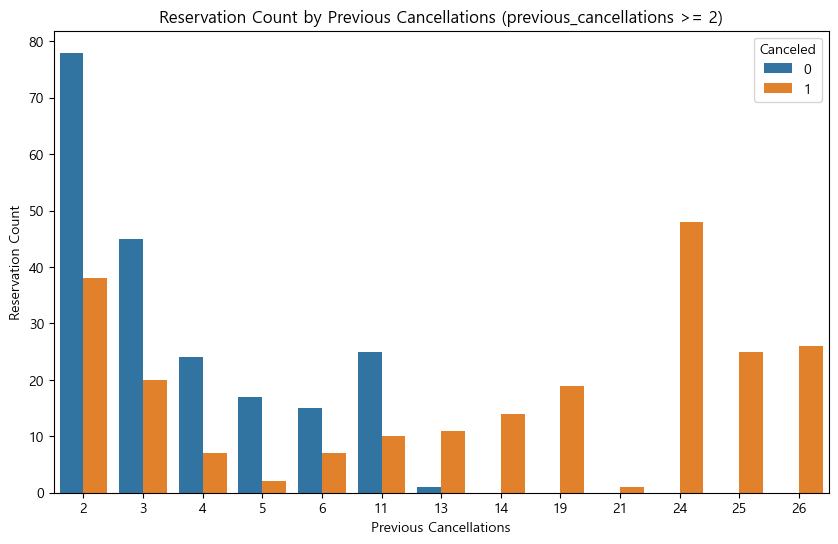

In [31]:
# previous_cancellations가 1 이상인 데이터 추출
df_filtered = df[df['previous_cancellations'] >= 2]

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_cancellations', hue='is_canceled', data=df_filtered)
plt.xlabel('Previous Cancellations')
plt.ylabel('Reservation Count')
plt.title('Reservation Count by Previous Cancellations (previous_cancellations >= 2)')
plt.legend(title='Canceled', loc='upper right')
plt.show()


### previous_bookings_not_canceled : 이번 예약전에 고객이 취소하지 않은 예약수에 대한 EDA

In [32]:
# 'previous_bookings_not_canceled' 값 확인
print(df['previous_bookings_not_canceled'].value_counts())

previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64


### reserved_room_type : 예약객실타입에 대한 EDA

In [33]:
print(df['reserved_room_type'].value_counts())

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64


### assigned_room_type: 배정된 객실 타입에 대한 EDA

In [34]:
print(df['assigned_room_type'].value_counts())

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64


### booking_changes : 예약 후 변경/수정횟수에 대한 EDA

In [35]:
print(df['booking_changes'].value_counts())

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64


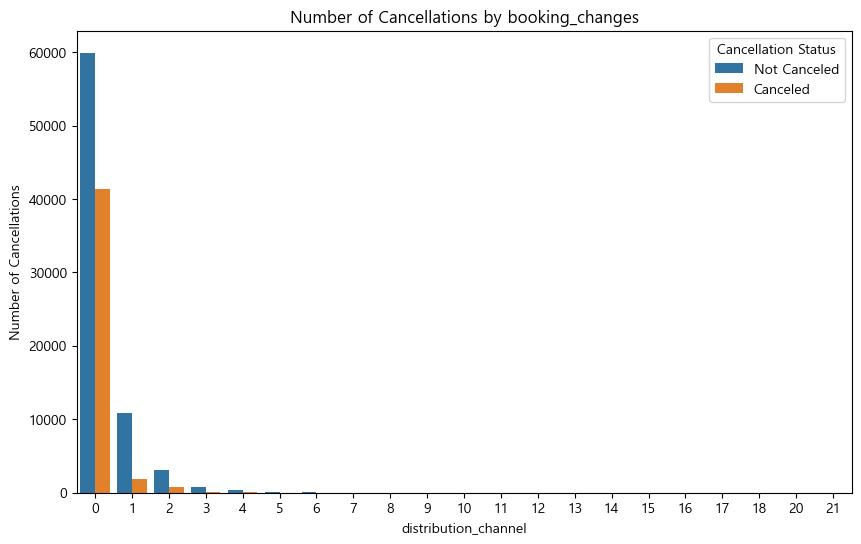

In [36]:
# booking_changes에 따른 취소
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='booking_changes', hue='is_canceled')

# 그래프 제목과 레이블 설정
plt.title('Number of Cancellations by booking_changes')
plt.xlabel('distribution_channel')
plt.ylabel('Number of Cancellations')

# 범례 추가
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])

# 그래프 출력
plt.show()

### deposit_type : 보증금 타입에 대한 EDA

In [37]:
print(df['deposit_type'].value_counts())

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


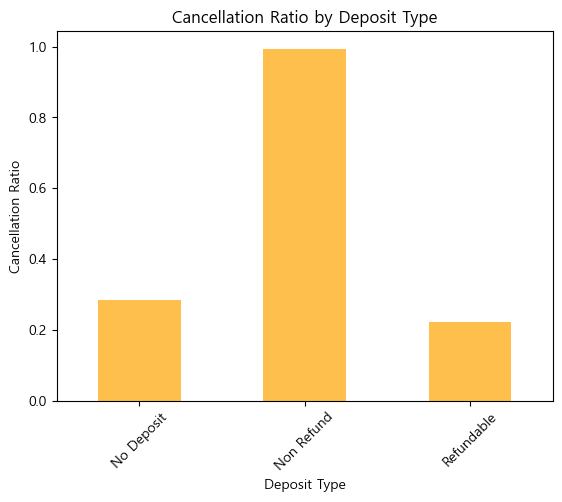

In [38]:
cancelled_counts = df[df['is_canceled'] == 1]['deposit_type'].value_counts()

# deposit_type별 전체 샘플 수 계산
total_counts = df['deposit_type'].value_counts()

# 각 deposit_type별 취소 비율 계산
cancel_ratio = cancelled_counts / total_counts

# 그래프 그리기
cancel_ratio.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Deposit Type')
plt.xticks(rotation=45)
plt.show()

### agent : 예약에이전트(ID로 대체)에 대한 EDA

In [39]:
print(df['agent'].value_counts())

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


### company : 예약회사명(ID로 대체)에 대한 EDA

In [40]:
print(df['company'].value_counts())

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64


### days_in_waiting_list : 예약확정전까지 대기 명단에 있었던 기간에 대한 EDA

In [41]:
print(df['days_in_waiting_list'].value_counts())

days_in_waiting_list
0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: count, Length: 128, dtype: int64


### customer_type : 고객유형에 대한 EDA

In [42]:
print(df['customer_type'].value_counts())

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


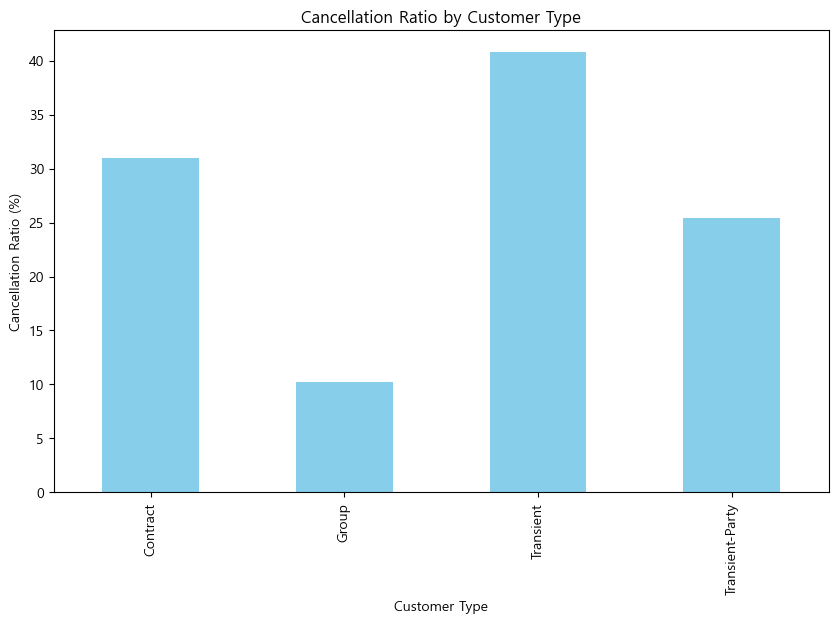

In [43]:
# 각 고객 유형별로 예약이 취소된 비율 계산
cancel_ratio_by_customer_type = df.groupby('customer_type')['is_canceled'].mean() * 100

# 막대 그래프 그리기
cancel_ratio_by_customer_type.plot(kind='bar', figsize=(10, 6), color='skyblue')

# 그래프 제목과 레이블 설정
plt.title('Cancellation Ratio by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Ratio (%)')

# 그래프 출력
plt.show()

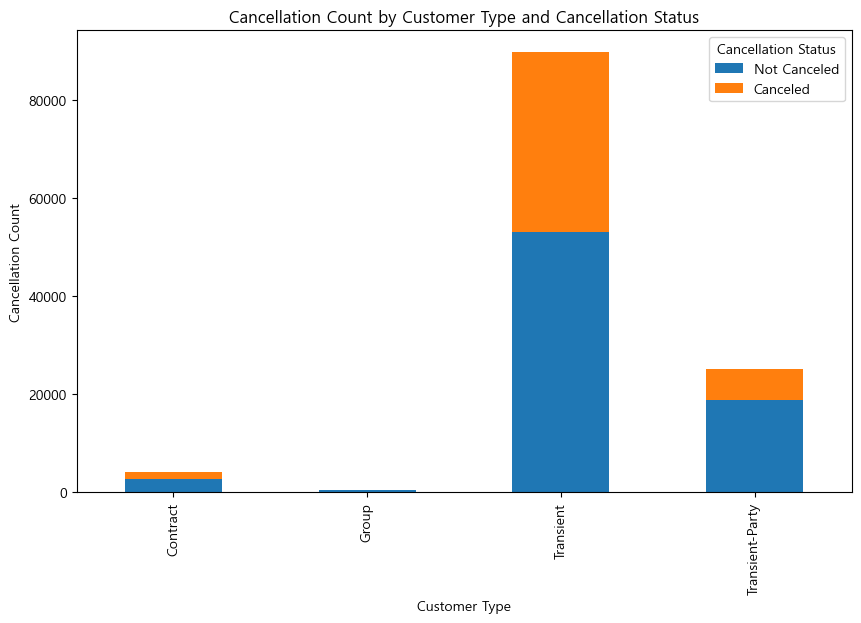

In [44]:
# 각 고객 유형별로 클래스(0 또는 1) 개수 계산
cancel_count_by_customer_type = df.groupby(['customer_type', 'is_canceled']).size().unstack()

# 막대 그래프 그리기
cancel_count_by_customer_type.plot(kind='bar', figsize=(10, 6), stacked=True)

# 그래프 제목과 레이블 설정
plt.title('Cancellation Count by Customer Type and Cancellation Status')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Count')

# 범례 추가
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])

# 그래프 출력
plt.show()

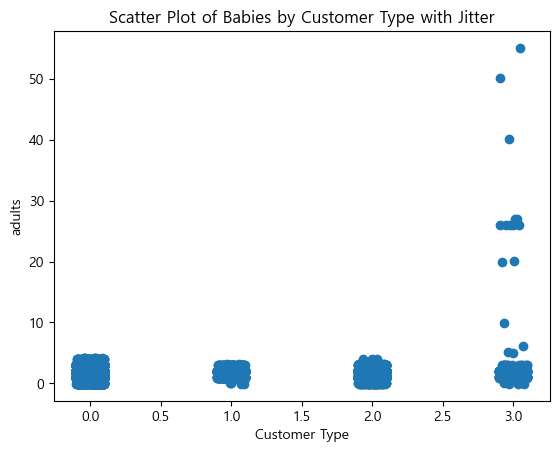

In [45]:
# 각 고유한 고객 유형에 대해 숫자로 매핑
customer_type_mapping = {'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}
df['customer_type_mapped'] = df['customer_type'].map(customer_type_mapping)

# jitter를 생성
jitter = 0.1

# x축과 y축 데이터에 jitter를 더함
x_jitter = df['customer_type_mapped'] + np.random.uniform(-jitter, jitter, len(df))
y_jitter = df['adults'] + np.random.uniform(-jitter, jitter, len(df))

# 산포도 그리기
plt.scatter(x_jitter, y_jitter)
plt.xlabel('Customer Type')
plt.ylabel('adults')
plt.title('Scatter Plot of Babies by Customer Type with Jitter')
plt.show()

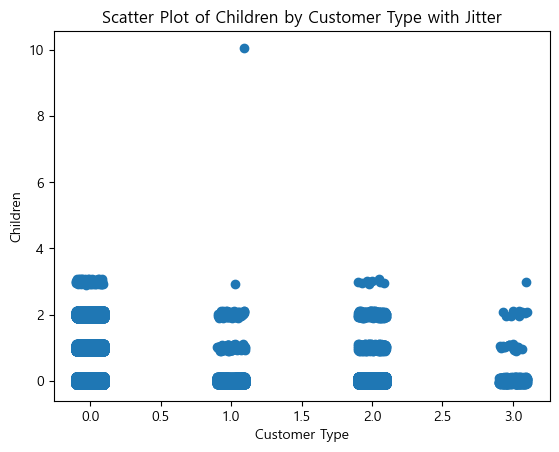

In [46]:
# jitter를 생성
jitter = 0.1

# x축과 y축 데이터에 jitter를 더함
x_jitter = df['customer_type_mapped'] + np.random.uniform(-jitter, jitter, len(df))
y_jitter = df['children'] + np.random.uniform(-jitter, jitter, len(df))

# 산포도 그리기
plt.scatter(x_jitter, y_jitter)
plt.xlabel('Customer Type')
plt.ylabel('Children')
plt.title('Scatter Plot of Children by Customer Type with Jitter')
plt.show()

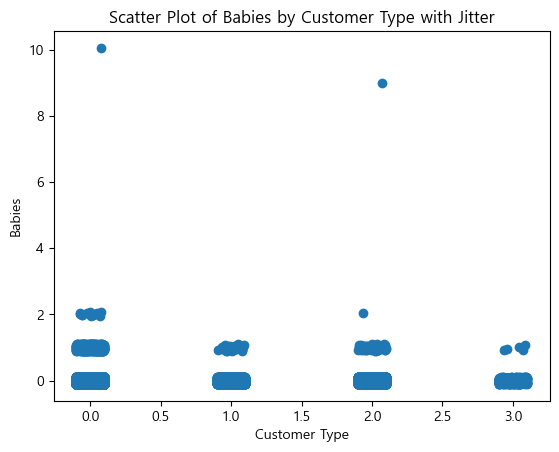

In [47]:
# 각 고유한 고객 유형에 대해 숫자로 매핑
customer_type_mapping = {'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}
df['customer_type_mapped'] = df['customer_type'].map(customer_type_mapping)

# jitter를 생성
jitter = 0.1

# x축과 y축 데이터에 jitter를 더함
x_jitter = df['customer_type_mapped'] + np.random.uniform(-jitter, jitter, len(df))
y_jitter = df['babies'] + np.random.uniform(-jitter, jitter, len(df))

# 산포도 그리기
plt.scatter(x_jitter, y_jitter)
plt.xlabel('Customer Type')
plt.ylabel('Babies')
plt.title('Scatter Plot of Babies by Customer Type with Jitter')
plt.show()

### adr : 평균 일일 숙박비에 대한 EDA

In [48]:
print(df['adr'].value_counts())

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64


### required_car_parking_spaces : 주차공간을 요구하는 차량대수

In [49]:
print(df['required_car_parking_spaces'].value_counts())

required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64


### total_of_special_requests : 특별한 요청수

In [50]:
print(df['total_of_special_requests'].value_counts())

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64


### reservation_status : 마지막 예약상태

In [51]:
print(df['reservation_status'].value_counts())

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


### reservation_status_date : 마지막 예약상태가 설정된 일자

In [52]:
print(df['reservation_status_date'].value_counts())

reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: count, Length: 926, dtype: int64


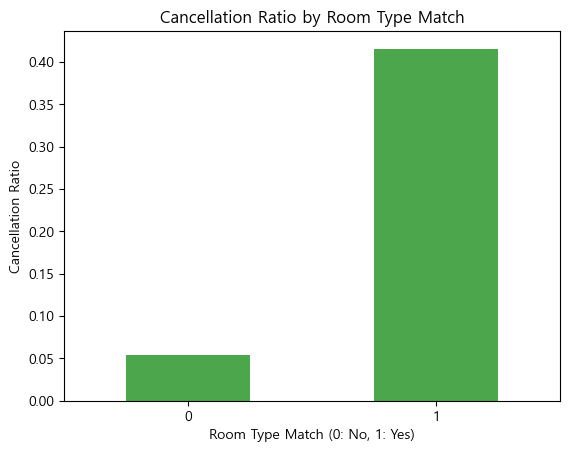

In [53]:

df['room_type_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)


cancel_ratio_by_room_type_match = df.groupby('room_type_match')['is_canceled'].mean()

# 그래프 그리기
cancel_ratio_by_room_type_match.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Room Type Match (0: No, 1: Yes)')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Room Type Match')
plt.xticks(rotation=0)
plt.show()

### 수치형 변수들에 대한 상관관계 행렬 계산

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

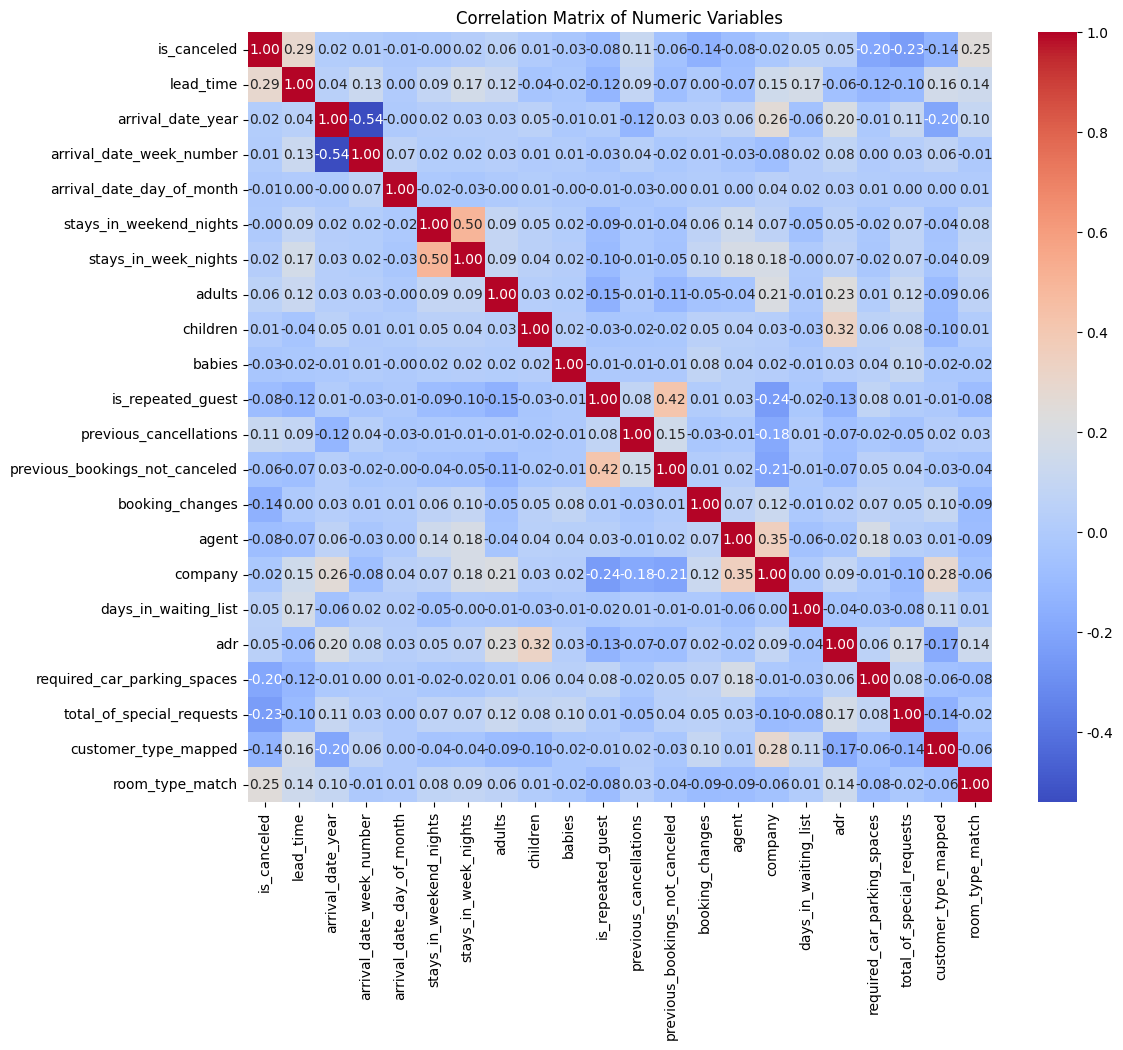

In [177]:
# 수치형 열만 선택
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 상관계수 행렬 계산
correlation_matrix = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))  # 그림 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### 전체 feature에 대한 EDA

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

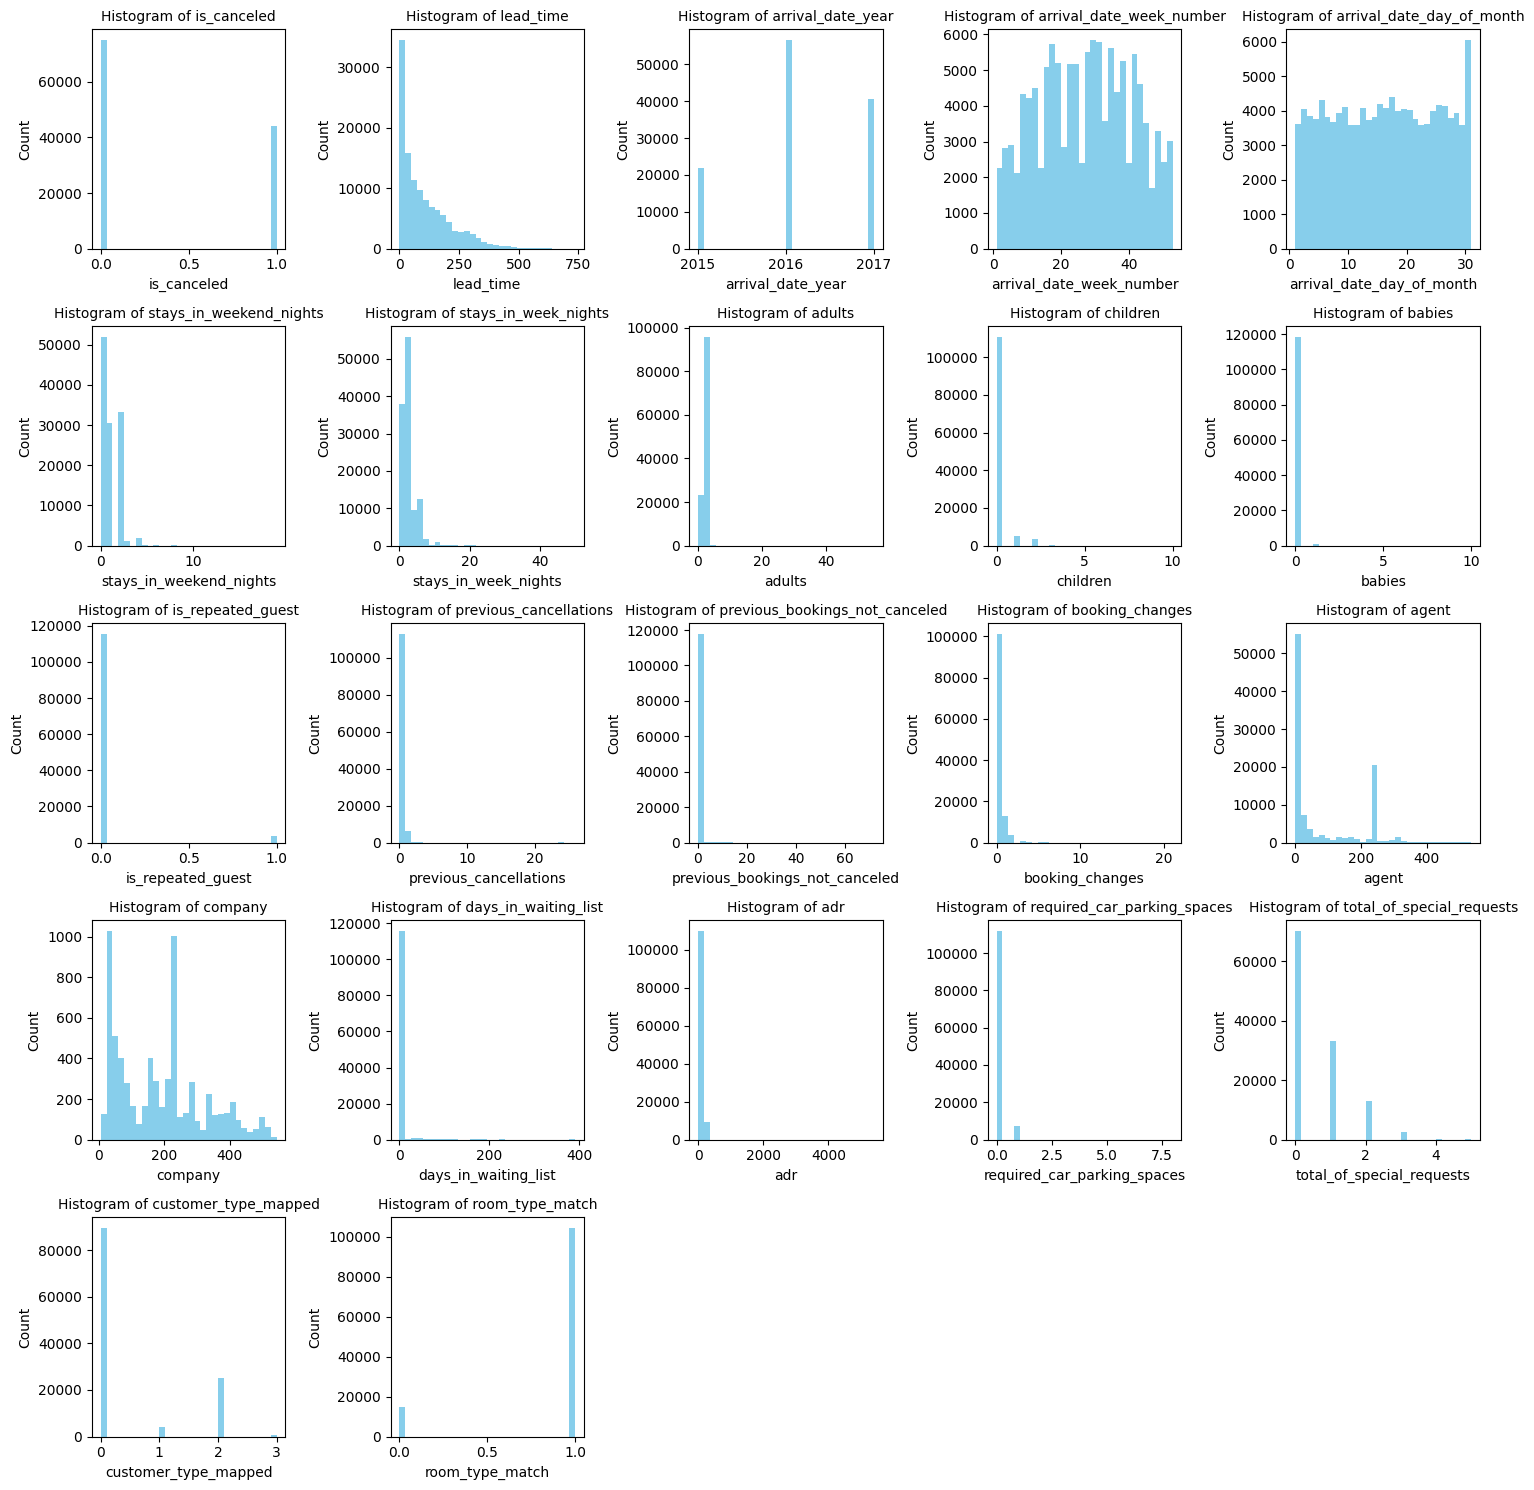

In [178]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_plots_per_row = 5
num_rows = math.ceil(len(numerical_features) / num_plots_per_row)
plt.figure(figsize=(15, num_rows * 3))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    plt.hist(df[feature], bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}', fontsize=10)
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Feature Engineering

# 인코딩 

In [179]:
file_path = 'hotel_booking.csv'



# train CSV 파일 읽기
hotel_data = pd.read_csv(file_path)
df = hotel_data.copy()
# 데이터 출력(잘 들어왔는지 확인)
df.head()  # 처음 다섯 줄 출력

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [180]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [181]:
# reserved_room_type 열과 assigned_room_type 열을 비교하여 matching 열 생성
# 같으면 1 다르면 0
df['matching'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

# 삭제 column

In [182]:
df = df.drop(columns=['arrival_date_week_number', 'reservation_status_date', 'reservation_status','assigned_room_type'])

In [183]:
# 결측치 제거
df = df.dropna(subset=['country', 'children'])
#음수 제거
df = df[df['adr'] >= 0 ]
# 상위 15개 국가를 제외한 나머지를 'Other'로 변경
country_counts = df['country'].value_counts()
top_15_countries = country_counts.index[:15]
df['country'] = df['country'].apply(lambda x: x if x in top_15_countries else 'Other')
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company                           112274
days_in_waiting_list                   0
customer_type   

In [184]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Other', 'DEU', 'BEL',
       'CHE', 'CN', 'ITA', 'NLD', 'SWE', 'BRA', 'AUT'], dtype=object)

In [185]:
# object 타입 컬럼의 list
obj_cols = list(df.columns[df.dtypes == 'object'])

# object_cols 컬럼들의 unique values 조회
for col in list(obj_cols):
    print(f'** {col}: \n{df[col].unique()}')

** hotel: 
['Resort Hotel' 'City Hotel']
** arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
** meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']
** country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Other' 'DEU' 'BEL' 'CHE' 'CN' 'ITA'
 'NLD' 'SWE' 'BRA' 'AUT']
** market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
** distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
** reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']
** deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']
** customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']


In [186]:
#df['market_segment'] ->바이너리 인코딩
segment_mapping = {
    'Direct': 0,
    'Corporate': 1,
    'Online TA': 2,
    'Offline TA/TO': 3,
    'Complementary': 4,
    'Groups': 5,
    'Aviation': 6
}
df['market_segment_encoded'] = df['market_segment'].map(segment_mapping)
max_bits = len(format(max(segment_mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'market_segment_{i}'] = df['market_segment_encoded'].apply(lambda x: (x >> i) & 1)
# 중간에 생성된 'market_segment_encoded' 열과 'market_segment' 열을 제거
df.drop(columns=['market_segment_encoded', 'market_segment'], inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,matching,market_segment_0,market_segment_1,market_segment_2
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,0,0,0,0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,1,1,0,0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,30,2,5,2,0.0,...,NaN,0,Transient,96.14,0,0,1,1,1,0
119386,City Hotel,0,102,2017,August,31,2,5,3,0.0,...,NaN,0,Transient,225.43,0,2,1,0,1,0
119387,City Hotel,0,34,2017,August,31,2,5,2,0.0,...,NaN,0,Transient,157.71,0,4,1,0,1,0
119388,City Hotel,0,109,2017,August,31,2,5,2,0.0,...,NaN,0,Transient,104.40,0,0,1,0,1,0


In [187]:
#df['arrival_date_month'] ->바이너리 인코딩
month_mapping = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
}

df['month_encoded'] = df['arrival_date_month'].map(month_mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(month_mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'arrival_date_month_{i}'] = df['month_encoded'].apply(lambda x: (x >> i) & 1)

# 'month_encoded,arrival_date_month' 열을 제거
df.drop(columns=['month_encoded','arrival_date_month'], inplace=True)


In [188]:
#df['country'] ->바이너리 인코딩
country_mapping = {country: idx for idx, country in enumerate(df['country'].unique())}
df['country_encoded'] = df['country'].map(country_mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(country_mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'country_{i}'] = df['country_encoded'].apply(lambda x: (x >> i) & 1)

# 'country_encoded,country_arrival_date_month' 열을 제거
df.drop(columns=['country_encoded','country'], inplace=True)

In [189]:
#df['distribution_channel'] ->바이너리 인코딩
country_mapping = {country: idx for idx, country in enumerate(df['distribution_channel'].unique())}
df['distribution_channel_encoded'] = df['distribution_channel'].map(country_mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(country_mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'distribution_channel_{i}'] = df['distribution_channel_encoded'].apply(lambda x: (x >> i) & 1)

# 'country_encoded,country_arrival_date_month' 열을 제거
df.drop(columns=['distribution_channel_encoded','distribution_channel'], inplace=True)

In [190]:
#df['reserved_room_type'] ->바이너리 인코딩
reserved_room_type_mapping = {country: idx for idx, country in enumerate(df['reserved_room_type'].unique())}
df['reserved_room_type_encoded'] = df['reserved_room_type'].map(reserved_room_type_mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(reserved_room_type_mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'reserved_room_type_{i}'] = df['reserved_room_type_encoded'].apply(lambda x: (x >> i) & 1)

# 'country_encoded,country_arrival_date_month' 열을 제거
df.drop(columns=['reserved_room_type_encoded','reserved_room_type'], inplace=True)

In [191]:
#df['deposit_type'] ->바이너리 인코딩
mapping = {country: idx for idx, country in enumerate(df['deposit_type'].unique())}
df['deposit_type_encoded'] = df['deposit_type'].map(mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'deposit_type_{i}'] = df['deposit_type_encoded'].apply(lambda x: (x >> i) & 1)

# 'country_encoded,country_arrival_date_month' 열을 제거
df.drop(columns=['deposit_type_encoded','deposit_type'], inplace=True)

In [192]:
#df['customer_type'] ->바이너리 인코딩
mapping = {country: idx for idx, country in enumerate(df['customer_type'].unique())}
df['customer_type_encoded'] = df['customer_type'].map(mapping)

# 정수를 이진수 문자열로 변환하여 별도의 컬럼으로 나누기
max_bits = len(format(max(mapping.values()), 'b'))  # 필요한 비트 수 계산
for i in range(max_bits):
    df[f'customer_type_{i}'] = df['customer_type_encoded'].apply(lambda x: (x >> i) & 1)

# 'country_encoded,country_arrival_date_month' 열을 제거
df.drop(columns=['customer_type_encoded','customer_type'], inplace=True)

In [193]:
# df['meal'] Undefined 삭제 및 ordered 인코딩
df = df[df['meal'] != 'Undefined']
meal_mapping = {'SC' : 0, 'BB' : 1, 'HB' : 2, 'FB':3}
df['meal'] = df['meal'].map(meal_mapping)
# df['arrival_date_year'] 1,2,3으로 만듬
df['arrival_date_year'] = df['arrival_date_year'].map({2014:0, 2015:1, 2016:2, 2017:3})

In [194]:
#df['hotel'] --> 바이너리
hotel_mapping = {'Resort Hotel': 0, 'City Hotel' : 1}
df['hotel'] = df['hotel'].map(hotel_mapping)

def map_values(row):
    if pd.isna(row['agent']) and pd.isna(row['company']):
        return 0
    elif pd.notna(row['agent']) and pd.notna(row['company']):
        return 1
    else:
        return 0.5

df['A_C_exist'] = df.apply(map_values, axis=1)

# agent와 company 컬럼 삭제
df.drop(columns=['agent', 'company'], inplace=True)

# 결과 출력
print(df)

        hotel  is_canceled  lead_time  arrival_date_year  \
0           0            0        342                  1   
1           0            0        737                  1   
2           0            0          7                  1   
3           0            0         13                  1   
4           0            0         14                  1   
...       ...          ...        ...                ...   
119385      1            0         23                  3   
119386      1            0        102                  3   
119387      1            0         34                  3   
119388      1            0        109                  3   
119389      1            0        205                  3   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                              

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117732 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117732 non-null  int64  
 1   is_canceled                     117732 non-null  int64  
 2   lead_time                       117732 non-null  int64  
 3   arrival_date_year               117732 non-null  int64  
 4   arrival_date_day_of_month       117732 non-null  int64  
 5   stays_in_weekend_nights         117732 non-null  int64  
 6   stays_in_week_nights            117732 non-null  int64  
 7   adults                          117732 non-null  int64  
 8   children                        117732 non-null  float64
 9   babies                          117732 non-null  int64  
 10  meal                            117732 non-null  int64  
 11  is_repeated_guest               117732 non-null  int64  
 12  previous_cancellation

In [196]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_2,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,deposit_type_0,deposit_type_1,customer_type_0,customer_type_1,A_C_exist
0,0,0,342,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,737,1,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,7,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,0,0,13,1,1,0,1,1,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5
4,0,0,14,1,1,0,2,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,3,30,2,5,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5
119386,1,0,102,3,31,2,5,3,0.0,0,...,0,1,1,0,0,0,0,0,0,0.5
119387,1,0,34,3,31,2,5,2,0.0,0,...,0,0,1,0,0,0,0,0,0,0.5
119388,1,0,109,3,31,2,5,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0.5


### 결측치 제거 확인

In [197]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
matching                          0
market_segment_0                  0
market_segment_1                  0
market_segment_2                  0
arrival_date_month_0              0
arrival_date_month_1              0
arrival_date_month_2              0
arrival_date_month_3              0
country_0                   

In [198]:
df.to_csv('end_hotel_bookings.csv', index=False)